In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The SDE of Hull-While model is given by

$
dr(t) = \left(\theta(t) - a r(t)\right ) dt + \sigma(t) dW(t).
$

With following equation

$
dx(t) = - a x(t) dt + \sigma(t) dW(t)\ \text{and}\ x(0) = 0,
$

the stochastic process $r$ is expressed by

$
r(t) = \phi(t) + x(t).
$

First term of right side of the equation is satisfied by

$
d \phi(t) =\left( \theta(t) - a \phi(t) \right) dt.
$

$
\phi(t) = \int_{0}^{t} \theta(u) e^{-a (t - u)} du
$

Let $x(t)$ be following form:

$
X(t) = \exp(\int_{0}^{t} a du) x(t),
$

$
d X(t) = \sigma(t) \exp(at) dW(t)
$

The discount factor is expressed by

$
D(t, T) = \frac{D(0, T)}{D(0, t)} \exp \left( \frac{\Xi(t)}{2} \left(B^{2}(t, S) - B^{2}(T, S)\right) - B(t, T) X(t) \right),
$

where

$
B(t, T) = \int_{t}^{T} \exp\left( - a u \right) du,
$

$
\Xi(s, t) = \int_{s}^{t} \tilde{\sigma}^{2}(u) du,
$

$
\tilde{\sigma}(t) = \sigma(t) \exp \left( a t \right).
$

In [29]:
mr = 0.01

In [30]:
df_test = pd.DataFrame(pd.date_range('2018/7/31', '2028/7/31'), columns=['date'])
df_test['dcf'] = (df_test - df_test.shift())['date'].apply(lambda x: x.days) / 360
df_test['mean_reversion'] = mr

maturity = (df_test.iloc[-1, 0] - df_test.iloc[0, 0]).days / 360
sigma_tilde = np.exp(mr * maturity)

In [57]:
df_test['dcf * mr'] = df_test['dcf'] * df_test['mean_reversion']
sigma_tilde_num_int = np.exp(df_test['dcf * mr'].sum())
base_date = df_test['date'][0]
df_test['maturity'] = df_test['date'].map(lambda x: (x - base_date).days / 360)

df_test['sigma^2(t)'] = np.exp(df_test['mean_reversion'] * df_test['maturity'])
df_test['dxi(t)'] = df_test['sigma^2(t)'] * df_test['dcf']
df_test['xi(t)'] = df_test['dxi(t)'].cumsum()

In [114]:
df_test['-a*u'] = - df_test['mean_reversion'] * df_test['maturity']

In [116]:
df_test.head()

,date,dcf,mean_reversion,dcf * mr,maturity,sigma^2(t),dxi(t),xi(t),-a*u
0,2018-07-31,NaN,0.01,NaN,0.000000,1.000000,NaN,NaN,-0.000000
1,2018-08-01,0.002778,0.01,0.000028,0.002778,1.000028,0.002778,0.002778,-0.000028
2,2018-08-02,0.002778,0.01,0.000028,0.005556,1.000056,0.002778,0.005556,-0.000056
3,2018-08-03,0.002778,0.01,0.000028,0.008333,1.000083,0.002778,0.008334,-0.000083
4,2018-08-04,0.002778,0.01,0.000028,0.011111,1.000111,0.002778,0.011112,-0.000111


In [138]:
def B_t_T(df, str_t, str_T):
    df_tmp = df.set_index('date')
    df_tmp['-a*u'] = df_tmp['-a*u'] * df_tmp['dcf']
    return df_tmp[str_t : str_T]['-a*u'].sum()

In [150]:
B_t_T(df_test, '2022/7/31', '2028/7/31') - B_t_T(df_test, '2026/7/31', '2028/7/31') 

-0.24699467592592605

In [151]:
B_t_T(df_test, '2022/7/31', '2026/7/31') - B_t_T(df_test, '2026/7/31', '2026/7/31')

-0.2469946759259259

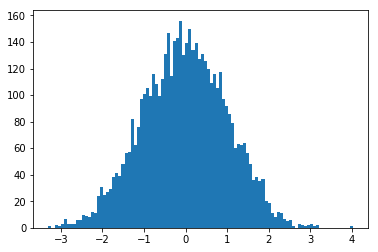

In [177]:
plt.hist(random_array, bins=100);

In [27]:
df_date[]

,date,dcf
0,2018-07-31,0.002778
1,2018-08-01,0.002778
2,2018-08-02,0.002778
3,2018-08-03,0.002778
4,2018-08-04,0.002778
5,2018-08-05,0.002778
6,2018-08-06,0.002778
7,2018-08-07,0.002778
8,2018-08-08,0.002778
9,2018-08-09,0.002778


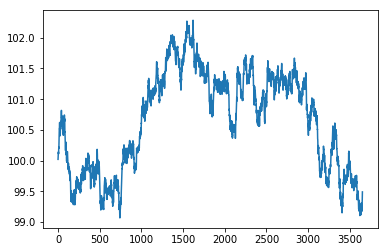

In [259]:
df_date = pd.DataFrame(pd.date_range('2018/7/31', '2028/7/31'), columns=['date'])
list_dcf = dt_obj_to_dcf(df_date, 360)
plt.plot(create_one_path(100, list_dcf));

In [22]:
def dt_obj_to_dcf(df_date, convention):
    yearfrac = int(convention)
    df_date['dcf'] = (df_date.shift(-1) - df_date)['date'].apply(lambda x: x.days) / yearfrac
    return df_date['dcf'].tolist()[:-1]

def create_one_path(x_0, list_dcf):
    array_result = np.zeros(len(list_dcf))
    z = np.random.randn(len(list_dcf))
    array_result[0] = x_0
    for i in range(len(list_dcf) - 1):
        array_result[i+1] = array_result[i] +  np.sqrt(list_dcf[i]) * z[i]
    return array_result

def create_path(num_path, x_0, list_dcf):
    array_result = np.zeros([num_path, len(list_dcf)])
    for i in range(num_path):
        array_result[i, :] = create_one_path(x_0, list_dcf)
    return array_result

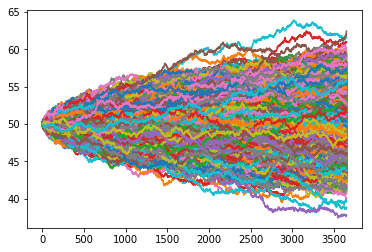

In [25]:
df_date = pd.DataFrame(pd.date_range('2018/7/31', '2028/7/31'), columns=['date'])
list_dcf = dt_obj_to_dcf(df_date, 360)
array_path = create_path(5000, 50, list_dcf)
for i in range(len(array_path)):
    plt.plot(array_path[i]);

# gomi

In [ ]:
# def create_one_path_old(x_0, list_dcf):
#     x = x_0
#     result = []
#     z = np.random.randn(len(list_dcf))
#     for i in range(len(list_dcf)):
#         x += np.sqrt(list_dcf[i]) * z[i]
#         result.append(x)
#     return result

# def create_path_old(num_path, list_dcf):
#     list_result = [[] for i in range(num_path)]
#     for i in range(num_path):
#         list_result[i] = create_one_path(num_path, list_dcf)
#     return list_result